In [1]:
#import cell to import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

As a first step, I attempt to explore the columns that are relevant to this question.

The dataset from a CSV file named 'data.csv' is loaded into a pandas dataframe. We filter the dataframe to include only the rows where the 'sbelig' column has the value 'yes, selected for microscopy'. Column 'hv025' & 'hml32' correspond to type of residence and malaria result from blood smear test respectively. Size() function measures the occurences of each dtaa point ('positive' or 'negative'), and then unstack() pivots that table into a more readable format.

#### Since it is not explicitely stated, after some basic research and deduction from the provided data,  I am concluding that the microscope test is performed on blood smear test. It may or may not be medically accurate, however this assumption guides our analysis.

In [2]:
df=pd.read_csv('data.csv')
microscopy_df=df[df['sbelig']=='yes, selected for microscopy']
grouped_df = microscopy_df.groupby(['hv025', 'hml32']).size().unstack(fill_value=0) #filling Nan values with 0
grouped_df

C:\Users\catch\AppData\Local\Temp\ipykernel_17004\3641177970.py:1: DtypeWarning: Columns (55,73,105,117,169,171,172,186,187,200,201,202,203,204,205,206,207,208,214,215,217,219,239,240,241,242,243,244,245,246,247,248,249,264,266,271,277,278,279,280,281,282,284,285,301,302,305,328,334) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data.csv')


hml32,negative,positive
hv025,,
rural,3287,1430
urban,2921,506


These numbers were cross-checked by a summation of all the positive and negative cases.

In [4]:
positive_malaria = (microscopy_df['hml32'] == 'positive').sum()
negative_malaria = (microscopy_df['hml32'] == 'negative').sum()
positive_malaria,negative_malaria

(1936, 6208)

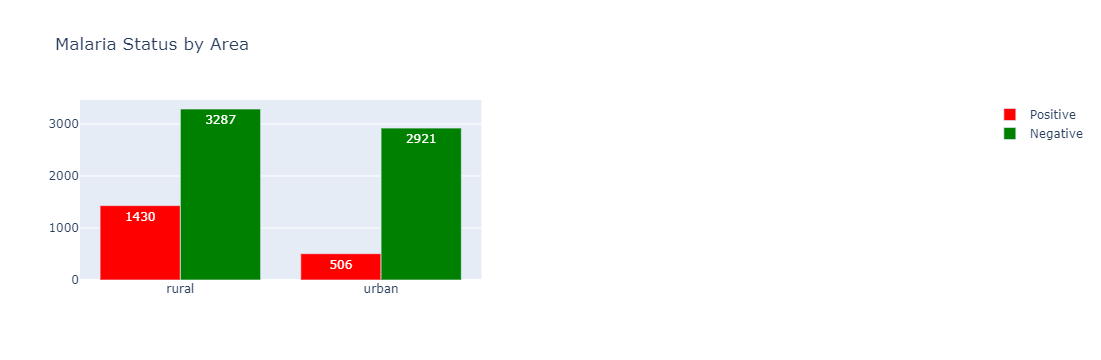

In [7]:
total_tested=(microscopy_df['sbelig'].count())
grouped_df = grouped_df.reset_index()
grouped_df.columns.name = None

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(name='Positive', x=grouped_df['hv025'], y=grouped_df['positive'], marker_color='red',text=grouped_df['positive'], textposition='auto'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(name='Negative', x=grouped_df['hv025'], y=grouped_df['negative'], marker_color='green',text=grouped_df['negative'], textposition='auto'),
    row=1, col=1
)

fig.update_layout(barmode='group', title_text='Malaria Status by Area', showlegend=True)
fig.show()

As a result, we can clearly see that rural areas have a higher number of malaria positive cases when found through microscope tests than urban areas. Rural areas have been found to have 1403 positive cases while urban have 506, which is nearly 3x the urban amount.